## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

from sklearn.model_selection import train_test_split

import numpy as np


# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [3]:
stud_df = pd.read_csv("students-data.csv",sep=';')

## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [4]:
stud_df.index.name = 'number'


# print('Total missing values for each feature\n',stud_df.isnull().sum())
# print(stud_df.isnull().sum().sum())
# To check if there is missing data

if stud_df.isnull().values.any():
    print("There is missing data, check the sample of data to drop")
else:
    print("There is no missing data in the given sample")




There is no missing data in the given sample


In [5]:
stud_df.head(10)
stud_df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [6]:
print('All the attribute names which are not numerical:\n')
print(stud_df.select_dtypes(include=['category',object]).dtypes,'\n')
print('All the attribute names which are numerical:\n')
print(stud_df.select_dtypes(exclude=['category',object]).dtypes,'\n')


All the attribute names which are not numerical:

school        object
sex           object
address       object
famsize       object
Pstatus       object
Mjob          object
Fjob          object
reason        object
guardian      object
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
dtype: object 

All the attribute names which are numerical:

age           int64
Medu          int64
Fedu          int64
traveltime    int64
studytime     int64
failures      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object 



## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [7]:
print('The variance for each of the feature: \n')
print(stud_df.var(axis=0))
print('\nThe feature with variance less than 1 returns True value: \n')
print(stud_df.var(ddof=0) < 1.0)


The variance for each of the feature: 

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

The feature with variance less than 1 returns True value: 

age           False
Medu          False
Fedu          False
traveltime     True
studytime      True
failures       True
famrel         True
freetime       True
goout         False
Dalc           True
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool


In [8]:
low_var = ['traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'Dalc']

print('\nThe features with variance less than 1 are: \n',low_var)

print('\n After dropping the features with varinace less than 1, the new dataset has the below features\n')
new_df = stud_df.drop(low_var,axis=1)
print(new_df.columns)
        
    


The features with variance less than 1 are: 
 ['traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'Dalc']

 After dropping the features with varinace less than 1, the new dataset has the below features

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'goout',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [9]:
cols= stud_df.select_dtypes(include=['object'])
cat_cols= list(cols.columns)
print('The list of categorical attributes are:\n',cat_cols)

The list of categorical attributes are:
 ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Apply LabelEncoder(le) on each of the categorical feature columns:
stud_df[cat_cols] = stud_df[cat_cols].apply(lambda col: le.fit_transform(col))
print(stud_df[cat_cols].head(10))

        school  sex  address  famsize  Pstatus  Mjob  Fjob  reason  guardian  \
number                                                                         
0            0    0        1        0        0     0     4       0         1   
1            0    0        1        0        1     0     2       0         0   
2            0    0        1        1        1     0     2       2         1   
3            0    0        1        0        1     1     3       1         1   
4            0    0        1        0        1     2     2       1         0   
5            0    1        1        1        1     3     2       3         1   
6            0    1        1        1        1     2     2       1         1   
7            0    0        1        0        0     2     4       1         1   
8            0    1        1        1        0     3     2       1         1   
9            0    1        1        0        1     2     2       1         1   

        schoolsup  famsup  paid  activi

## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [11]:
stud_df['G1'] = np.where(stud_df['G1']<10, 'fail(0)', 'pass(1)')
stud_df['G2'] = np.where(stud_df['G2']<10, 'fail(0)', 'pass(1)')
stud_df['G3'] = np.where(stud_df['G3']<10, 'fail(0)', 'pass(1)')


In [12]:
print(stud_df[['G1','G2','G3']].head(10))

             G1       G2       G3
number                           
0       fail(0)  fail(0)  fail(0)
1       fail(0)  fail(0)  fail(0)
2       fail(0)  fail(0)  pass(1)
3       pass(1)  pass(1)  pass(1)
4       fail(0)  pass(1)  pass(1)
5       pass(1)  pass(1)  pass(1)
6       pass(1)  pass(1)  pass(1)
7       fail(0)  fail(0)  fail(0)
8       pass(1)  pass(1)  pass(1)
9       pass(1)  pass(1)  pass(1)


In [13]:
#Apply LabelEncoder(le) on ['G1','G2','G3'] columns:

cat_grades=['G1','G2','G3']
stud_df[cat_grades] = stud_df[cat_grades].apply(lambda col: le.fit_transform(col))
print(stud_df[cat_grades].head(10))

        G1  G2  G3
number            
0        0   0   0
1        0   0   0
2        0   0   1
3        1   1   1
4        0   1   1
5        1   1   1
6        1   1   1
7        0   0   0
8        1   1   1
9        1   1   1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [14]:
array = stud_df.values

X = array[:, :-1] # for all but last column, all attributes as features
y = array[:,-1]  # for last column G3, target attribute

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

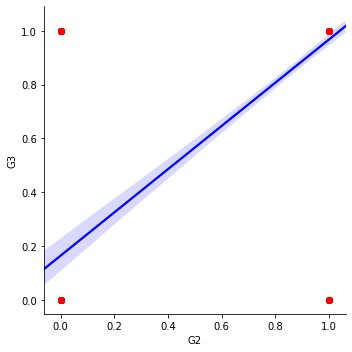

In [15]:
sns.lmplot(x="G2", y="G3", data=stud_df, scatter_kws={'color': 'red'},line_kws={'color': 'blue'})

In [ ]:
# The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.

## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

AxesSubplot(0.125,0.125;0.775x0.755)


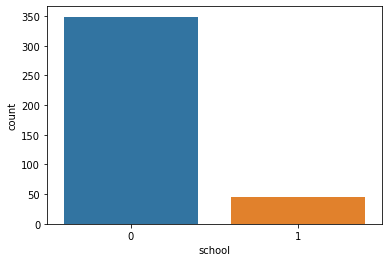

In [16]:
# student's school 
# binary: '0' for 'GP' - Gabriel Pereira 
# binary: '1' for 'MS' - Mousinho da Silveira

stud_df.groupby(["school"]).count()
print(sns.countplot(x="school", data=stud_df))

In [17]:
# student's school 
# binary: '0' for 'GP' - Gabriel Pereira 
# binary: '1' for 'MS' - Mousinho da Silveira

groups = stud_df.groupby(['school','age']).size()
print(groups)

school  age
0       15      82
        16     104
        17      86
        18      57
        19      18
        20       1
        22       1
1       17      12
        18      25
        19       6
        20       2
        21       1
dtype: int64


Number of students with different ages in GP:

age
15     82
16    104
17     86
18     57
19     18
20      1
22      1
dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


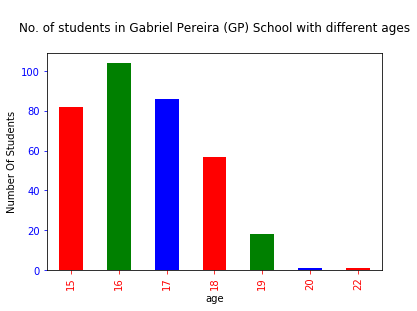

In [18]:
print('Number of students with different ages in GP:\n')
print(groups[0])

# naming the y-axis 
plt.ylabel('Number Of Students') 
# plot title 
plt.title('\nNo. of students in Gabriel Pereira (GP) School with different ages\n') 
#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='r')
ax.tick_params(axis='y', colors='b')
print('\n')
print(groups[0].plot.bar(color=['r', 'g', 'b']))

Number of students with different ages in MS:

age
17    12
18    25
19     6
20     2
21     1
dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


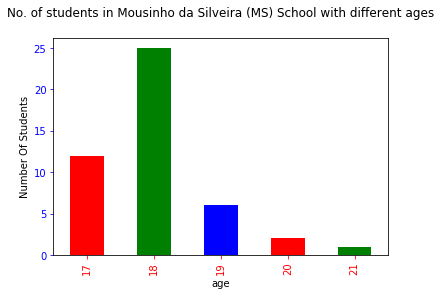

In [19]:
print('Number of students with different ages in MS:\n')
print(groups[1])

# naming the y-axis 
plt.ylabel('Number Of Students') 
# plot title 
plt.title('No. of students in Mousinho da Silveira (MS) School with different ages\n') 
#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='r')
ax.tick_params(axis='y', colors='b')
print('\n')
print(groups[1].plot.bar(color=['r', 'g', 'b']))

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [51]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
print(X.shape,y.shape)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(395, 32) (395,)
(276, 32) (119, 32) (276,) (119,)


In [21]:
X_train = stud_df.head(300)
X_test = stud_df.tail(95)

y_train = X_train.pop("G3")
y_test = X_test.pop("G3")
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(300, 32) (95, 32) (300,) (95,)


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [22]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print("Accuracy of logistic regression classifier on test set:")
print(model_score)

Accuracy of logistic regression classifier on test set:
0.8842105263157894


C:\Users\kramesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
print(metrics.confusion_matrix(y_test, y_predict))


[[23  8]
 [ 3 61]]


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.74      0.81        31
           1       0.88      0.95      0.92        64

    accuracy                           0.88        95
   macro avg       0.88      0.85      0.86        95
weighted avg       0.88      0.88      0.88        95



# Naive bayes with Iris data

### Import Iris.csv

In [25]:
iris_df = pd.read_csv("Iris.csv")

In [26]:
iris_df.shape

(150, 5)

In [27]:
iris_df.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
iris_df.columns

Index(['Sepal Length (in cm)', 'Sepal Width in (cm)', 'Petal length (in cm)',
       'Petal width (in cm)', 'Class'],
      dtype='object')

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [29]:
array1 = iris_df.values

X_ = array1[:, :-1] # all independent variables 
y_ = array1[:,-1]  # last column - dependent variable

### Find the distribution of target variable (Class)

                 Sepal Length (in cm)  Sepal Width in (cm)  \
Class                                                        
Iris-setosa                        50                   50   
Iris-versicolor                    50                   50   
Iris-virginica                     50                   50   

                 Petal length (in cm)  Petal width (in cm)  
Class                                                       
Iris-setosa                        50                   50  
Iris-versicolor                    50                   50  
Iris-virginica                     50                   50  


AxesSubplot(0.125,0.125;0.775x0.755)


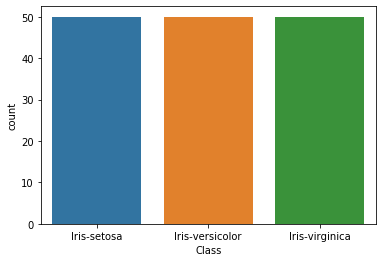

In [30]:
print(iris_df.groupby(["Class"]).count())
print('\n')
print(sns.countplot(x="Class", data=iris_df))

C:\Users\kramesh\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


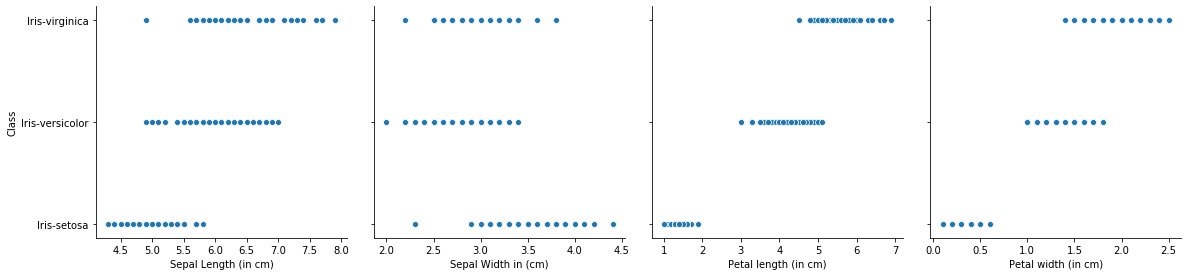

In [31]:
pp = sns.pairplot(data=iris_df,
                  y_vars=['Class'],
                  x_vars=['Sepal Length (in cm)', 'Sepal Width in (cm)', 'Petal length (in cm)', 'Petal width (in cm)'],size=4)

### Plot the distribution of target variable using histogram

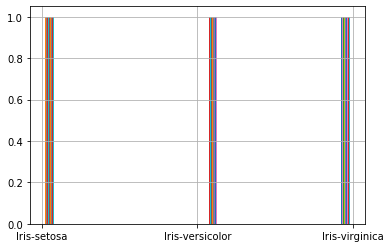

In [32]:
plt.figure();
iris_df['Class'].hist()


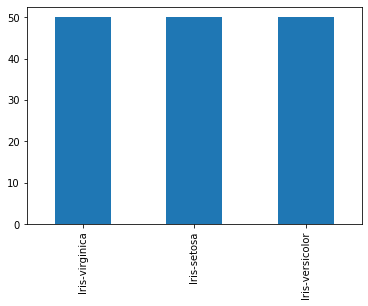

In [33]:
pd.value_counts(iris_df["Class"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

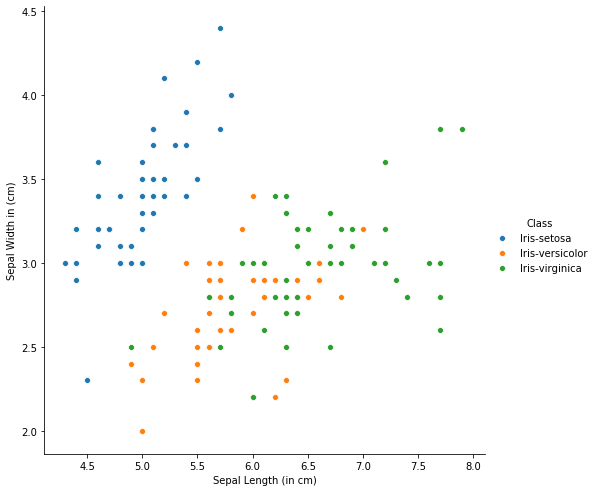

In [34]:
sns.pairplot(x_vars=['Sepal Length (in cm)'], y_vars=['Sepal Width in (cm)'], data=iris_df, hue="Class", size=7)

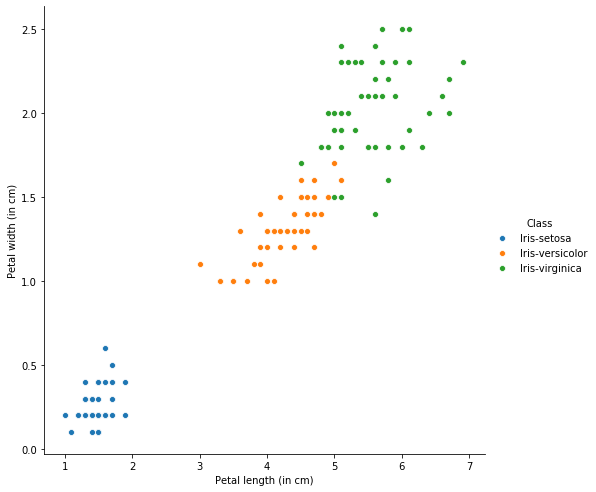

In [35]:
sns.pairplot(x_vars=['Petal length (in cm)'], y_vars=['Petal width (in cm)'], data=iris_df, hue="Class", size=7)

In [36]:
#iris-virginica has longest sepal and petal length compared to other two types

### Summary Statistics and explain insights for at least 2 variables

In [37]:
grouped_data = iris_df.groupby(['Class'])
grouped_data['Sepal Length (in cm)','Petal length (in cm)'].describe()

Sepal Length (in cm)                                         \
                               count   mean       std  min    25%  50%  75%   
Class                                                                         
Iris-setosa                     50.0  5.006  0.352490  4.3  4.800  5.0  5.2   
Iris-versicolor                 50.0  5.936  0.516171  4.9  5.600  5.9  6.3   
Iris-virginica                  50.0  6.588  0.635880  4.9  6.225  6.5  6.9   

                     Petal length (in cm)                                   \
                 max                count   mean       std  min  25%   50%   
Class                                                                        
Iris-setosa      5.8                 50.0  1.464  0.173511  1.0  1.4  1.50   
Iris-versicolor  7.0                 50.0  4.260  0.469911  3.0  4.0  4.35   
Iris-virginica   7.9                 50.0  5.552  0.551895  4.5  5.1  5.55   

                             
                   75%  max  
Class                        
Iris-setosa      1.575  1.9  
Iris-versicolor  4.600  5.1  
Iris-virginica   5.875  6.9

In [38]:
# Mean Sepal Length for all Species of flowers are comparable and Mean Petal legths for all Species of flowers differs a lot. 

### Correlation among all variables and give your insights

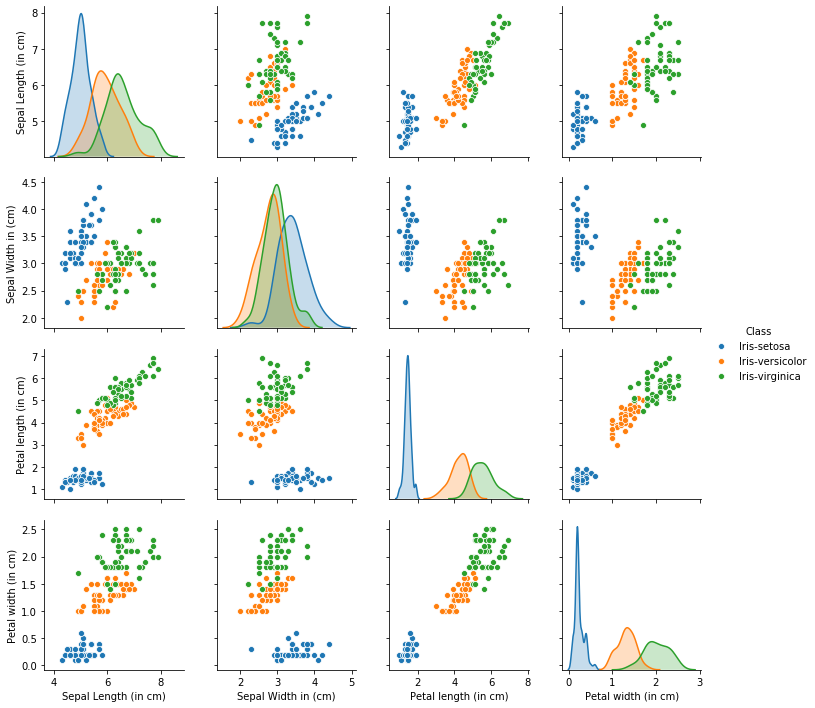

In [39]:
sns.pairplot(iris_df, hue = 'Class')

In [40]:
# Only the correlation between PetalWidth and SepalLength and the correlation between PetalWidth and SepalWidth are slightly positive.

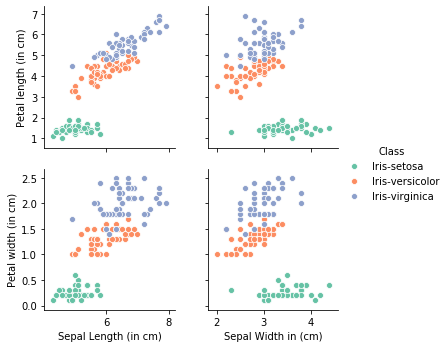

In [41]:
sns.pairplot(iris_df,x_vars=['Sepal Length (in cm)', 'Sepal Width in (cm)'], 
             y_vars=['Petal length (in cm)', 'Petal width (in cm)'],hue='Class',palette='Set2')

### Split data in Training and Validation in 80:20

In [42]:
#from sklearn.model_selection import train_test_split  
# Create the training and test data set in the ratio of 80:20 respectively. Can be any other ratio...

test_size = 0.20 # taking 80:20 training and test set
seed = 82  # Random numbmer seeding for reapeatability of the code

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_, y_, test_size=test_size,random_state=seed)  

### Do Feature Scaling

In [43]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train1)

X_train1 = scaler.transform(X_train1)  
X_test1 = scaler.transform(X_test1)  

### Train and Fit NaiveBayes Model

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(X_train1, y_train1)

GaussianNB(priors=None, var_smoothing=1e-09)

In [46]:
# Predicting the Test set results
expected = y_test1
predicted = model.predict(X_test1)
print(predicted)

['Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor']


In [47]:
#lets see the actual and predicted value side by side
y_compare = np.vstack((expected,predicted)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

array([['Iris-virginica', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa']], dtype=object)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [48]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected, predicted)
print(cm)

[[11  0  0]
 [ 0  8  1]
 [ 0  1  9]]


In [54]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum()))

Correct predictions:  28
False predictions 2

Accuracy of the Naive Bayes Clasification is:  0.9333333333333333


In [53]:
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30

